
## Exploratory Data Analysis (EDA) for Coffee Dataset



---

Capstone Project by Celine Lai Lu Yi

<a id='data_description'></a>

### Description of the Coffee Dataset columns

---

This dataset contains reviews of 1309 arabica coffee beans from the Coffee Quality Institute's trained reviewers. Dataset retrieved from: https://github.com/jldbc/coffee-quality-database

The descriptions for the columns are:
    
    BEAN METADATA
    Species (Arabica)
    Color
    Processing Method: washed, natural, and pulped
    
    FARM METADATA
    Country of Origin
    Region
    Altitude (in metres)
    Producer
    Harvest Year
    
    QUALITY MEASURES
    Aroma
    Flavor
    Aftertaste
    Acidity
    Body
    Balance
    Uniformity
    Clean Cup
    Sweetness
    Cupper Points: overall score of coffee
    Total Cup Points: sum of all above measures
    Moisture
    Category 1 Defects
    Category 2 Defects
    Quakers



Some coffee terminology:
* Clean Cup: Indicates no flavor defects present   
* Moisture: Moisture content in coffee beans
* Category 1 Defects: Full black or sour bean, pod/cherry, and large or medium sticks or stones
* Category 2 Defects: Parchment, hull/husk, broken/chipped, insect damage, partial black or sour, shell, small sticks or 
stones, water damage
* Quakers: Quakers are unripened beans that are hard to identify during hand sorting and green bean inspection. They're often, but not always, caused by poor soil conditions which limit sugar and starch development.
    


### Overview

- [Description of the Coffee Dataset](#data_description)
- [Load the data](#load_data)
- [View dimensions and data types](#dtypes)
- [Remove rows with empty altitude data](#drop_nulls)
- [Retain only rows with altitude data in metres and export as CSV](#drop_ft)
- [Summary statistics for the columns](#describe)
- [Correlation Matrix](#correlate)
- [Scatter Plot with Regression line](#scatter)

**Load packages:**

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')
plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='load_data'></a>

### 1. Load the data

---

Import the csv into a pandas DataFrame.

In [2]:
coffee_file = './datasets/arabica_coffee_data.csv'

In [3]:
coffee = pd.read_csv(coffee_file)
coffee.drop('Unnamed: 0', axis=1, inplace=True)
coffee

,Species,Color,Processing Method,Country of Origin,Region,Producer,Harvest Year,Aroma,Flavor,Aftertaste,...,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Category Two Defects,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Green,Washed / Wet,Ethiopia,guji-hambela,METAD PLC,2014,8.67,8.83,8.67,...,8.75,90.58,0.12,0,0.0,0,m,1950.00,2200.00,2075.00
1,Arabica,Green,Washed / Wet,Ethiopia,guji-hambela,METAD PLC,2014,8.75,8.67,8.50,...,8.58,89.92,0.12,0,0.0,1,m,1950.00,2200.00,2075.00
2,Arabica,NaN,NaN,Guatemala,NaN,NaN,NaN,8.42,8.50,8.42,...,9.25,89.75,0.00,0,0.0,0,m,1600.00,1800.00,1700.00
3,Arabica,Green,Natural / Dry,Ethiopia,oromia,Yidnekachew Dabessa Coffee Plantation,2014,8.17,8.58,8.42,...,8.67,89.00,0.11,0,0.0,2,m,1800.00,2200.00,2000.00
4,Arabica,Green,Washed / Wet,Ethiopia,guji-hambela,METAD PLC,2014,8.25,8.50,8.25,...,8.58,88.83,0.12,0,0.0,2,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Arabica,None,Washed / Wet,Mexico,juchique de ferrer,JUAN CARLOS GARCÍA LOPEZ,2012,7.08,6.83,6.25,...,6.75,68.33,0.11,0,0.0,20,m,900.00,900.00,900.00
1305,Arabica,Blue-Green,Natural / Dry,Haiti,"department d'artibonite , haiti",COEB Koperativ Ekselsyo Basen,2012,6.75,6.58,6.42,...,6.42,67.92,0.14,8,0.0,16,m,350.00,350.00,350.00
1306,Arabica,Green,Other,Nicaragua,jalapa,Teófilo Narváez,2016,7.25,6.58,6.33,...,6.17,63.08,0.13,1,0.0,5,m,1100.00,1100.00,1100.00
1307,Arabica,Green,Washed / Wet,Guatemala,nuevo oriente,WILLIAM ESTUARDO MARTINEZ PACHECO,2012,7.50,6.67,6.67,...,6.67,59.83,0.10,0,0.0,4,ft,1417.32,1417.32,1417.32


<a id='dtypes'></a>

### 2. View dimensions and data types

---


In [4]:
# Check dimensions
coffee.shape

(1309, 26)

In [5]:
# Check dtypes of the columns:
coffee.dtypes

Species                  object
Color                    object
Processing Method        object
Country of Origin        object
Region                   object
Producer                 object
Harvest Year             object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean Cup               float64
Sweetness               float64
Cupper Points           float64
Total Cup Points        float64
Moisture                float64
Category One Defects      int64
Quakers                 float64
Category Two Defects      int64
unit_of_measurement      object
altitude_low_meters     float64
altitude_high_meters    float64
altitude_mean_meters    float64
dtype: object

<a id='drop_nulls'></a>

### 3. Remove rows with empty altitude data

---


In [6]:
coffee.isnull().sum()

Species                   0
Color                   214
Processing Method       150
Country of Origin         1
Region                   57
Producer                229
Harvest Year             51
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean Cup                 0
Sweetness                 0
Cupper Points             0
Total Cup Points          0
Moisture                  0
Category One Defects      0
Quakers                   1
Category Two Defects      0
unit_of_measurement       0
altitude_low_meters     225
altitude_high_meters    225
altitude_mean_meters    225
dtype: int64

In [7]:
coffee = coffee.loc[~coffee['altitude_mean_meters'].isnull(), :]
coffee.dropna(inplace=True)
print(coffee.shape)
coffee

(849, 26)


C:\Users\Celine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Species,Color,Processing Method,Country of Origin,Region,Producer,Harvest Year,Aroma,Flavor,Aftertaste,...,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Category Two Defects,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Green,Washed / Wet,Ethiopia,guji-hambela,METAD PLC,2014,8.67,8.83,8.67,...,8.75,90.58,0.12,0,0.0,0,m,1950.00,2200.00,2075.00
1,Arabica,Green,Washed / Wet,Ethiopia,guji-hambela,METAD PLC,2014,8.75,8.67,8.50,...,8.58,89.92,0.12,0,0.0,1,m,1950.00,2200.00,2075.00
3,Arabica,Green,Natural / Dry,Ethiopia,oromia,Yidnekachew Dabessa Coffee Plantation,2014,8.17,8.58,8.42,...,8.67,89.00,0.11,0,0.0,2,m,1800.00,2200.00,2000.00
4,Arabica,Green,Washed / Wet,Ethiopia,guji-hambela,METAD PLC,2014,8.25,8.50,8.25,...,8.58,88.83,0.12,0,0.0,2,m,1950.00,2200.00,2075.00
9,Arabica,Green,Natural / Dry,Ethiopia,"snnp/kaffa zone,gimbowereda",Diamond Enterprise Plc,2014,8.08,8.58,8.50,...,8.50,88.25,0.10,0,0.0,4,m,1795.00,1850.00,1822.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,Arabica,Green,Washed / Wet,Honduras,marcala,Omar Acosta,2014,7.00,6.33,6.17,...,6.33,69.17,0.10,0,0.0,4,m,1450.00,1450.00,1450.00
1304,Arabica,None,Washed / Wet,Mexico,juchique de ferrer,JUAN CARLOS GARCÍA LOPEZ,2012,7.08,6.83,6.25,...,6.75,68.33,0.11,0,0.0,20,m,900.00,900.00,900.00
1305,Arabica,Blue-Green,Natural / Dry,Haiti,"department d'artibonite , haiti",COEB Koperativ Ekselsyo Basen,2012,6.75,6.58,6.42,...,6.42,67.92,0.14,8,0.0,16,m,350.00,350.00,350.00
1306,Arabica,Green,Other,Nicaragua,jalapa,Teófilo Narváez,2016,7.25,6.58,6.33,...,6.17,63.08,0.13,1,0.0,5,m,1100.00,1100.00,1100.00


<a id='drop_ft'></a>
### 4. Retain only rows with altitude data in metres and export as CSV

---


In [8]:
coffee = coffee.loc[coffee['unit_of_measurement'] == 'm',:]
coffee = coffee.loc[coffee['altitude_mean_meters']<10000, :]
coffee

,Species,Color,Processing Method,Country of Origin,Region,Producer,Harvest Year,Aroma,Flavor,Aftertaste,...,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Category Two Defects,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Green,Washed / Wet,Ethiopia,guji-hambela,METAD PLC,2014,8.67,8.83,8.67,...,8.75,90.58,0.12,0,0.0,0,m,1950.0,2200.0,2075.0
1,Arabica,Green,Washed / Wet,Ethiopia,guji-hambela,METAD PLC,2014,8.75,8.67,8.50,...,8.58,89.92,0.12,0,0.0,1,m,1950.0,2200.0,2075.0
3,Arabica,Green,Natural / Dry,Ethiopia,oromia,Yidnekachew Dabessa Coffee Plantation,2014,8.17,8.58,8.42,...,8.67,89.00,0.11,0,0.0,2,m,1800.0,2200.0,2000.0
4,Arabica,Green,Washed / Wet,Ethiopia,guji-hambela,METAD PLC,2014,8.25,8.50,8.25,...,8.58,88.83,0.12,0,0.0,2,m,1950.0,2200.0,2075.0
9,Arabica,Green,Natural / Dry,Ethiopia,"snnp/kaffa zone,gimbowereda",Diamond Enterprise Plc,2014,8.08,8.58,8.50,...,8.50,88.25,0.10,0,0.0,4,m,1795.0,1850.0,1822.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Arabica,Green,Washed / Wet,Honduras,marcala,Omar Acosta,2014,7.00,6.17,6.17,...,6.50,69.17,0.10,0,0.0,3,m,1450.0,1450.0,1450.0
1303,Arabica,Green,Washed / Wet,Honduras,marcala,Omar Acosta,2014,7.00,6.33,6.17,...,6.33,69.17,0.10,0,0.0,4,m,1450.0,1450.0,1450.0
1304,Arabica,None,Washed / Wet,Mexico,juchique de ferrer,JUAN CARLOS GARCÍA LOPEZ,2012,7.08,6.83,6.25,...,6.75,68.33,0.11,0,0.0,20,m,900.0,900.0,900.0
1305,Arabica,Blue-Green,Natural / Dry,Haiti,"department d'artibonite , haiti",COEB Koperativ Ekselsyo Basen,2012,6.75,6.58,6.42,...,6.42,67.92,0.14,8,0.0,16,m,350.0,350.0,350.0


In [9]:
coffee.to_csv('arabica_coffee_cleaned.csv')

<a id='describe'></a>

### 5. Summary statistics for the columns

---

In [10]:
coffee.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Category Two Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,7.552000,7.498336,7.373490,7.499490,7.483423,7.467893,9.869154,9.846913,9.952497,7.458309,82.001396,0.098698,0.441611,0.157047,3.911409,1275.922148,1313.451007,1294.686577
std,0.296425,0.325992,0.328596,0.297669,0.271016,0.335536,0.445053,0.766545,0.310449,0.397814,2.610607,0.041294,2.186748,0.786842,5.650691,493.613135,511.388877,498.516974
min,6.330000,6.170000,6.170000,6.080000,6.330000,6.080000,6.000000,0.000000,6.000000,5.170000,63.080000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,7.420000,7.330000,7.170000,7.330000,7.330000,7.250000,10.000000,10.000000,10.000000,7.250000,81.080000,0.100000,0.000000,0.000000,0.000000,1050.000000,1089.000000,1050.000000
50%,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.330000,0.110000,0.000000,0.000000,2.000000,1300.000000,1300.000000,1300.000000
75%,7.670000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,10.000000,10.000000,7.670000,83.420000,0.120000,0.000000,0.000000,5.000000,1550.000000,1599.000000,1550.000000
max,8.750000,8.830000,8.670000,8.750000,8.500000,8.580000,10.000000,10.000000,10.000000,8.750000,90.580000,0.170000,31.000000,11.000000,47.000000,4287.000000,4287.000000,4287.000000


In [11]:
coffee[['Acidity', 'Sweetness', 'Total Cup Points','altitude_mean_meters']].corr()

,Acidity,Sweetness,Total Cup Points,altitude_mean_meters
Acidity,1.000000,0.207810,0.761291,0.186790
Sweetness,0.207810,1.000000,0.412373,0.024088
Total Cup Points,0.761291,0.412373,1.000000,0.135449
altitude_mean_meters,0.186790,0.024088,0.135449,1.000000


#### Inferences from Correlation Data
1. Acidity is more correlated with higher Total Cup Points, compared to sweetness.
2. Altitude is not correlated to acidity or sweetness of the coffee.

<a id='scatter'></a>

### 6. Scatter Plot with Regression line

To further look into the inference noted about Acidity and Total Cup Points from correlation data above.

---

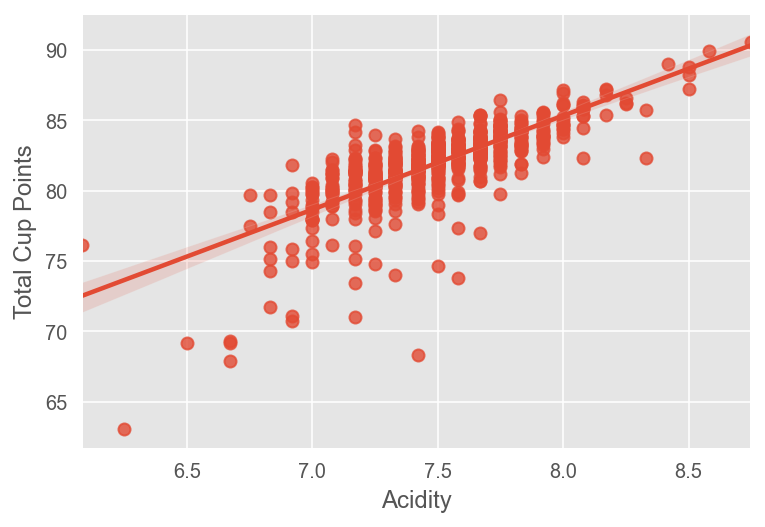

In [15]:
#coffee.plot.scatter(x='Acidity', y='Total Cup Points',s=None, c=None)
sns.regplot(x="Acidity", y="Total Cup Points", data=coffee);